Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

## Задания
Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
Постройте график по числу поездок по дате и времени.
Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

## Описание данных
* timestamp – дата и время (точность до часа)
* cnt – количество аренд велосипедов за этот час
* t1 – температура, в С
* t2 – температура "ощущается как", в С 
* hum – влажность (%)
* wind_speed – скорость ветра, км/ч
* weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain 

10 – дождь с грозой

26 – снегопад 

94 – ледяной туман (да, такое бывает!)

* isholiday – является ли день праздником (1 – праздник, 0 – нет)
* isweekend –  является ли день выходным (1 – выходной, 0 – нет)
* season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

### Задание 1

**Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.**

**Есть ли в данных пропущенные значения?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

sns.set(

font_scale=2,

style="whitegrid",

rc={'figure.figsize':(20,7)}

    )

%matplotlib inline

In [11]:
london = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Статистика/Статистический вывод/london.csv', parse_dates=['timestamp'])
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

* Да, но совсем немного
* Да, во многих
* **Нет**


### Задание 2

**Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:**

* по оси x – дата (timestamp)
* по оси y – число поездок (cnt)

**Выберите верные утверждения:**

Hint: sns.lineplot 

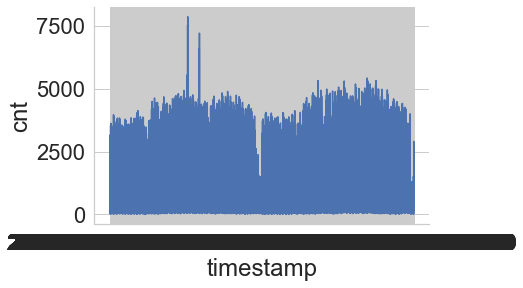

In [6]:
sns.lineplot(data=london, x=london.timestamp, y=london.cnt)
sns.despine()

* В выходные поездок точно меньше, чем в будние дни
* **Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды**
* Случались только аномальные скачки вверх, вниз ничего не падало

### Задание 3

**Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:**
```python
data.resample(rule='D').column_name.sum() #способ 1
data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему
```

**Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?**

In [13]:
london.sort_values(by='timestamp', inplace=True)
london.set_index('timestamp', drop=False, inplace=True)

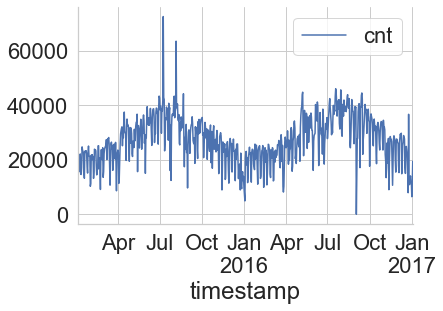

In [15]:
london.resample('D').agg({'cnt':'sum'}).plot()
sns.despine()

* Встречаются только резкие скачки вверх
* Максимальное число аренд за день – более 1 000 000
* **Зимой число аренд меньше, чем летом**
* **Встречаются как очень резкие скачки числа аренд, так и падения**
* **Максимальное число аренд за день составляет более 70 000**
* Число аренд зимой и летом никак не различается
* Максимальное число аренд за день не превышало 8 000

## Задание 4
Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

* сначала посчитаем скользящее среднее, чтобы сгладить ряд
* далее – разницу между наблюдаемыми и сглаженными значениями
* определим верхние и нижние границы 99% доверительного интервала 
* найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [16]:
by_day = london.resample('D').cnt.sum().reset_index()
by_day.head(3)

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613


In [17]:
by_day_roll = london.resample('D').cnt.sum().rolling(window=3).mean().reset_index()
by_day_roll.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [18]:
by_day_roll.query("timestamp == '2015-07-09'")

,timestamp,cnt
186,2015-07-09,50705.0


Ответ: `50705`

## Задание 5

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:
```
c = a - b
std = np.std(c)
```
В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [19]:
round(np.std(by_day['cnt'] - by_day_roll['cnt']), 2)

4558.59

In [20]:
std = np.std(by_day['cnt'] - by_day_roll['cnt'])

Ответ: `4558.59`

## Задание 6

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

* upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
* lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [21]:
upper_bound = by_day_roll.cnt + (2.576 * std)
lower_bound = by_day_roll.cnt - (2.576 * std)

In [22]:
round(upper_bound.loc[730], 2)

24302.92

In [23]:
by_day['upper_bound'] = upper_bound
by_day['lower_bound'] = lower_bound
by_day.head()

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479


Ответ: `24302.92`

## Задание 7

И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [24]:
by_day[by_day.cnt > by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


Ответ: `2015-07-09`

## Задание 8

Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка:

* **Забастовки в метро**
* Ветер
* Погода
* Ошибка при сборе данных
* Выборы

## Задание 9

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?



In [25]:
by_day[by_day.cnt < by_day.lower_bound]

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812


* Забастовки
* Ветер
* Погода
* Пробки
* **Ошибка при сборе данных**
* Выборы